**Linear,Ridge and Lasso Regression**

In [1]:
from sklearn.datasets import load_boston

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = load_boston()

In [4]:
df

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [5]:
dataset = pd.DataFrame(df.data)
print(dataset.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [34]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
df.target.shape

(506,)

In [36]:
dataset['Price'] =df.target

In [37]:
#Separating X and y
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

**Linear Regression**

In [38]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mse = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-37.13180746769903


In [39]:
 
print(lr.score(X_test, y_test))

0.6733825506400171


**Ridge Regression**

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [41]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540344


**Lasso Regression**

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.53158022069486


In [43]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)
print(prediction_lasso)
print(prediction_ridge)

[23.74549008 25.05669894 27.30699681 15.26474466 20.28388223 22.75172373
 21.45598059 24.23856649 21.11819135 19.95909495  8.98313974 13.30218316
 17.99925624  8.39272295 35.35448484 30.78862119 22.38396018 34.3159854
 29.8521009  24.63915134 25.7851669  25.20997813 20.07312698 29.34704456
 23.54801802 17.49320154 19.76581421 22.02254005 31.35043449 19.53061141
 17.86731915 20.03959005 22.70589322 24.27507125 28.3321545  20.26286175
 10.68729818 24.94704305 15.84336797 12.8254677  25.41186454 20.63647768
 22.05355817 16.77749717 23.30629191 25.77681736 19.84379805 23.32853181
 12.22570134 23.7054699  21.09270778 16.76593695 24.7895207  27.77843148
 15.02615536 21.29343807 21.55732101 17.59916216 18.35971801 19.53427781
 21.69584327 22.09466825 30.77701755 30.58126341 18.59617266 31.00696923
 18.55257582 18.71479862 15.79040727 22.86722623 21.5804364  23.05453916
 30.92223126 29.21101697 25.40070956  5.75970797 32.88156033 23.539222
 26.54430218 20.38280007 28.11924474 19.21283372 21.96

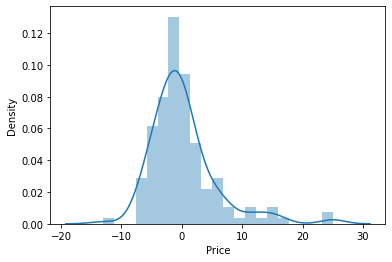

In [44]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

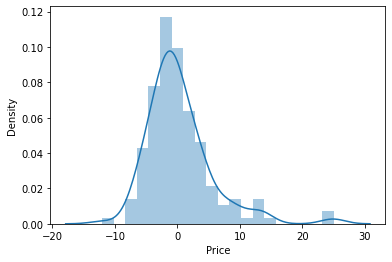

In [45]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)

Ridge regression is the best as the best score of -29.905701947540344 is nearest to 0 compared to linear and lasso regression.